<a href="https://colab.research.google.com/github/kangnurrohman/belajar-neural-network/blob/main/materi/Part%206%20-%20Callback%20and%20more%20ML%20Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
import zipfile
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/Colab Notebooks/data/diabetes.zip", 'r')
zip_ref.extractall("/content/data")
zip_ref.close()

In [ ]:
pip install jcopdl

In [4]:
import torch
from torch import nn, optim
from jcopdl.callback import Callback, set_config

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

## Dataset and Dataloader

In [5]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [6]:
bs = 128

transform = transforms.Compose([
    transforms.Grayscale(),
    transforms.ToTensor()
])

train_set = datasets.ImageFolder('/content/data/train', transform=transform)
train_loader = DataLoader(train_set, batch_size=bs, shuffle=True, num_workers=2)

test_set = datasets.ImageFolder('/content/data/test', transform=transform)
test_loader = DataLoader(test_set, batch_size=bs, shuffle=True, num_workers=2)

In [7]:
feature, target = next(iter(train_loader))
feature.shape

torch.Size([128, 1, 28, 28])

In [8]:
label2cat = train_set.classes
label2cat

['Ankle boot',
 'Bag',
 'Coat',
 'Dress',
 'Pullover',
 'Sandal',
 'Shirt',
 'Sneaker',
 'T-shirt or Top',
 'Trouser']

## Arsitektur & Config

In [9]:
from jcopdl.layers import linear_block

In [10]:
class FashionClassifier(nn.Module):
  def __init__(self, input_size, n1, n2, output_size, dropout):
    super().__init__()
    self.fc = nn.Sequential(
        nn.Flatten(),
        linear_block(input_size, n1, dropout=dropout),
        linear_block(n1, n2, dropout=dropout),
        linear_block(n2, output_size, activation="lsoftmax")
    )
  def forward(self, x):
    return self.fc(x)

In [11]:
config = set_config({
    "input_size" : 784,
    "n1" : 256,
    "n2" : 64,
    "output_size" : len(train_set.classes),
    "dropout" : 0.2
})

## Training Preparation -> MCOC

In [12]:
model = FashionClassifier(config.input_size, config.n1, config.n2, config.output_size, config.dropout).to(device)
criterion = nn.NLLLoss()
optimizer = optim.AdamW(model.parameters(), lr=0.001)
callback = Callback(model, config, outdir='/content/data/model')

## Training

In [13]:
from tqdm import tqdm

def loop_fn(mode, dataset, dataloader, model, criterion, optimizer, device):
  if mode == 'train':
    model.train()
  elif mode == 'test':
    model.eval()
  cost = correct = 0
  for feature, target in tqdm(dataloader, desc=mode.title()):
    feature, target = feature.to(device), target.to(device)
    output = model(feature)
    loss = criterion(output, target)

    if mode == 'train':
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()

    cost += loss.item() * feature.shape[0]
    correct += (output.argmax(1) == target).sum().item()
  cost = cost / len(dataset)
  acc = correct / len(dataset)
  return cost, acc

Test: 100%|██████████| 157/157 [00:10<00:00, 14.35it/s]



Epoch     1
Train_cost  = 0.7284 | Test_cost  = 0.4534 | Train_score = 0.7408 | Test_score = 0.8369 |


Test: 100%|██████████| 157/157 [00:05<00:00, 30.02it/s]



Epoch     2
Train_cost  = 0.4672 | Test_cost  = 0.4292 | Train_score = 0.8347 | Test_score = 0.8395 |


Test: 100%|██████████| 157/157 [00:05<00:00, 29.58it/s]



Epoch     3
Train_cost  = 0.4208 | Test_cost  = 0.3851 | Train_score = 0.8481 | Test_score = 0.8595 |


Test: 100%|██████████| 157/157 [00:09<00:00, 15.74it/s]



Epoch     4
Train_cost  = 0.3872 | Test_cost  = 0.3618 | Train_score = 0.8600 | Test_score = 0.8644 |


Test: 100%|██████████| 157/157 [00:08<00:00, 18.31it/s]



Epoch     5
Train_cost  = 0.3659 | Test_cost  = 0.3476 | Train_score = 0.8695 | Test_score = 0.8706 |


Test: 100%|██████████| 157/157 [00:05<00:00, 27.94it/s]



Epoch     6
Train_cost  = 0.3500 | Test_cost  = 0.3364 | Train_score = 0.8752 | Test_score = 0.8766 |


Test: 100%|██████████| 157/157 [00:05<00:00, 29.10it/s]



Epoch     7
Train_cost  = 0.3363 | Test_cost  = 0.3420 | Train_score = 0.8784 | Test_score = 0.8744 |
==> EarlyStop patience =  1 | Best test_score: 0.8766


Test: 100%|██████████| 157/157 [00:05<00:00, 27.91it/s]



Epoch     8
Train_cost  = 0.3246 | Test_cost  = 0.3285 | Train_score = 0.8826 | Test_score = 0.8788 |


Test: 100%|██████████| 157/157 [00:05<00:00, 29.83it/s]



Epoch     9
Train_cost  = 0.3158 | Test_cost  = 0.3199 | Train_score = 0.8838 | Test_score = 0.8824 |


Test: 100%|██████████| 157/157 [00:05<00:00, 29.38it/s]



Epoch    10
Train_cost  = 0.3078 | Test_cost  = 0.3201 | Train_score = 0.8882 | Test_score = 0.8805 |
==> EarlyStop patience =  1 | Best test_score: 0.8824


Test: 100%|██████████| 157/157 [00:05<00:00, 29.63it/s]



Epoch    11
Train_cost  = 0.2971 | Test_cost  = 0.3140 | Train_score = 0.8915 | Test_score = 0.8867 |


Test: 100%|██████████| 157/157 [00:05<00:00, 27.96it/s]



Epoch    12
Train_cost  = 0.2905 | Test_cost  = 0.3269 | Train_score = 0.8927 | Test_score = 0.8773 |
==> EarlyStop patience =  1 | Best test_score: 0.8867


Test: 100%|██████████| 157/157 [00:06<00:00, 24.13it/s]



Epoch    13
Train_cost  = 0.2835 | Test_cost  = 0.3292 | Train_score = 0.8972 | Test_score = 0.8852 |
==> EarlyStop patience =  2 | Best test_score: 0.8867


Test: 100%|██████████| 157/157 [00:05<00:00, 30.36it/s]



Epoch    14
Train_cost  = 0.2759 | Test_cost  = 0.3141 | Train_score = 0.8992 | Test_score = 0.8859 |
==> EarlyStop patience =  3 | Best test_score: 0.8867


Test: 100%|██████████| 157/157 [00:06<00:00, 24.53it/s]



Epoch    15
Train_cost  = 0.2713 | Test_cost  = 0.3021 | Train_score = 0.9010 | Test_score = 0.8906 |


Test: 100%|██████████| 157/157 [00:07<00:00, 21.88it/s]



Epoch    16
Train_cost  = 0.2647 | Test_cost  = 0.3144 | Train_score = 0.9022 | Test_score = 0.8863 |
==> EarlyStop patience =  1 | Best test_score: 0.8906


Test: 100%|██████████| 157/157 [00:06<00:00, 23.73it/s]



Epoch    17
Train_cost  = 0.2626 | Test_cost  = 0.3113 | Train_score = 0.9038 | Test_score = 0.8876 |
==> EarlyStop patience =  2 | Best test_score: 0.8906


Test: 100%|██████████| 157/157 [00:06<00:00, 22.90it/s]



Epoch    18
Train_cost  = 0.2580 | Test_cost  = 0.3042 | Train_score = 0.9050 | Test_score = 0.8893 |
==> EarlyStop patience =  3 | Best test_score: 0.8906


Test: 100%|██████████| 157/157 [00:06<00:00, 25.93it/s]



Epoch    19
Train_cost  = 0.2507 | Test_cost  = 0.3025 | Train_score = 0.9075 | Test_score = 0.8903 |
==> EarlyStop patience =  4 | Best test_score: 0.8906


Test: 100%|██████████| 157/157 [00:06<00:00, 25.50it/s]



Epoch    20
Train_cost  = 0.2488 | Test_cost  = 0.3075 | Train_score = 0.9074 | Test_score = 0.8884 |


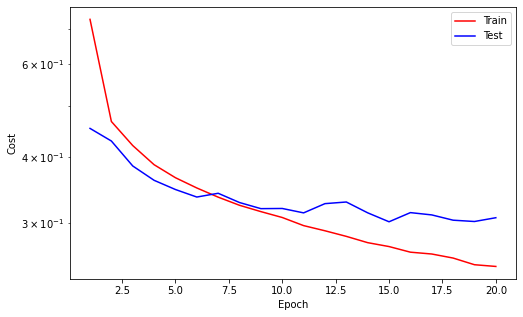

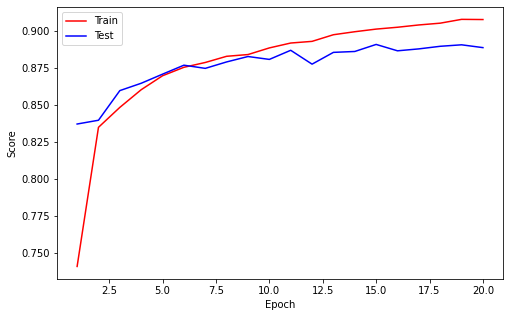

==> EarlyStop patience =  5 | Best test_score: 0.8906
==> Execute Early Stopping at epoch: 20 | Best test_score: 0.8906
==> Best model is saved at /content/data/model


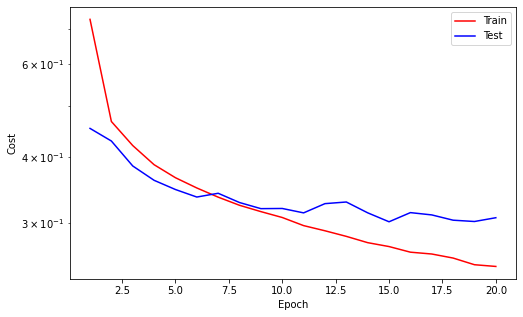

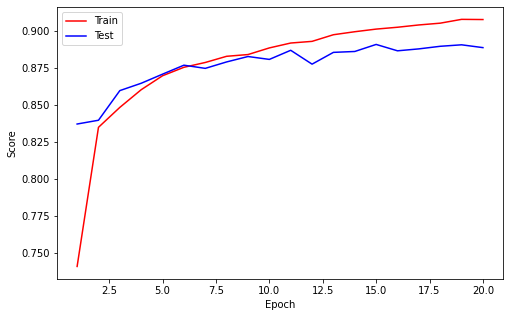

In [14]:
while True:
  train_cost, train_score = loop_fn("train", train_set, train_loader, model, criterion, optimizer, device)
  with torch.no_grad():
    test_cost, test_score = loop_fn("test", test_set, test_loader, model, criterion, optimizer, device)

  #Logging
  callback.log(train_cost, test_cost, train_score, test_score)

  #Checkpoint
  callback.save_checkpoint()

  #Runtime_plotting
  callback.cost_runtime_plotting()
  callback.score_runtime_plotting()

  #Early stopping
  if callback.early_stopping(model, monitor="test_score"):
        callback.plot_cost()
        callback.plot_score()
        break

## Load best model

In [16]:
weights = torch.load("/content/data/model/weights_best.pth", map_location="cpu")
config = torch.load("/content/data/model/configs.pth", map_location="cpu")

model = FashionClassifier(config.input_size, config.n1, config.n2, config.output_size, config.dropout).to(device)
model.load_state_dict(weights)
model = model.to(device)

## Predict

In [17]:
feature, target = next(iter(test_loader))
feature, target = feature.to(device), target.to(device)

In [18]:
with torch.no_grad():
  model.eval()
  output = model(feature)
  preds = output.argmax(1)
[label2cat[pred] for pred in preds]

['Trouser',
 'Bag',
 'Coat',
 'Pullover',
 'Bag',
 'Shirt',
 'Sandal',
 'Dress',
 'Ankle boot',
 'Coat',
 'Coat',
 'T-shirt or Top',
 'Sandal',
 'Pullover',
 'Trouser',
 'Coat',
 'Pullover',
 'Sandal',
 'Dress',
 'Shirt',
 'Pullover',
 'Sandal',
 'Trouser',
 'Pullover',
 'Bag',
 'Shirt',
 'Coat',
 'Shirt',
 'Sandal',
 'Sneaker',
 'Dress',
 'Sandal',
 'Bag',
 'Bag',
 'Dress',
 'Bag',
 'Sandal',
 'Coat',
 'T-shirt or Top',
 'Dress',
 'Coat',
 'Trouser',
 'Sandal',
 'Sandal',
 'Ankle boot',
 'Sneaker',
 'Ankle boot',
 'Dress',
 'T-shirt or Top',
 'Shirt',
 'Coat',
 'Dress',
 'Shirt',
 'Coat',
 'Ankle boot',
 'Shirt',
 'Bag',
 'Coat',
 'Sneaker',
 'Shirt',
 'Sandal',
 'Shirt',
 'Coat',
 'Pullover',
 'Dress',
 'Dress',
 'Sandal',
 'Dress',
 'Dress',
 'Coat',
 'Trouser',
 'Dress',
 'Dress',
 'Bag',
 'Sneaker',
 'Coat',
 'Trouser',
 'T-shirt or Top',
 'Sneaker',
 'Ankle boot',
 'T-shirt or Top',
 'Bag',
 'Shirt',
 'Pullover',
 'Dress',
 'Dress',
 'Trouser',
 'Pullover',
 'Trouser',
 'Sandal',

## Visualisasi

In [19]:
import matplotlib.pyplot as plt

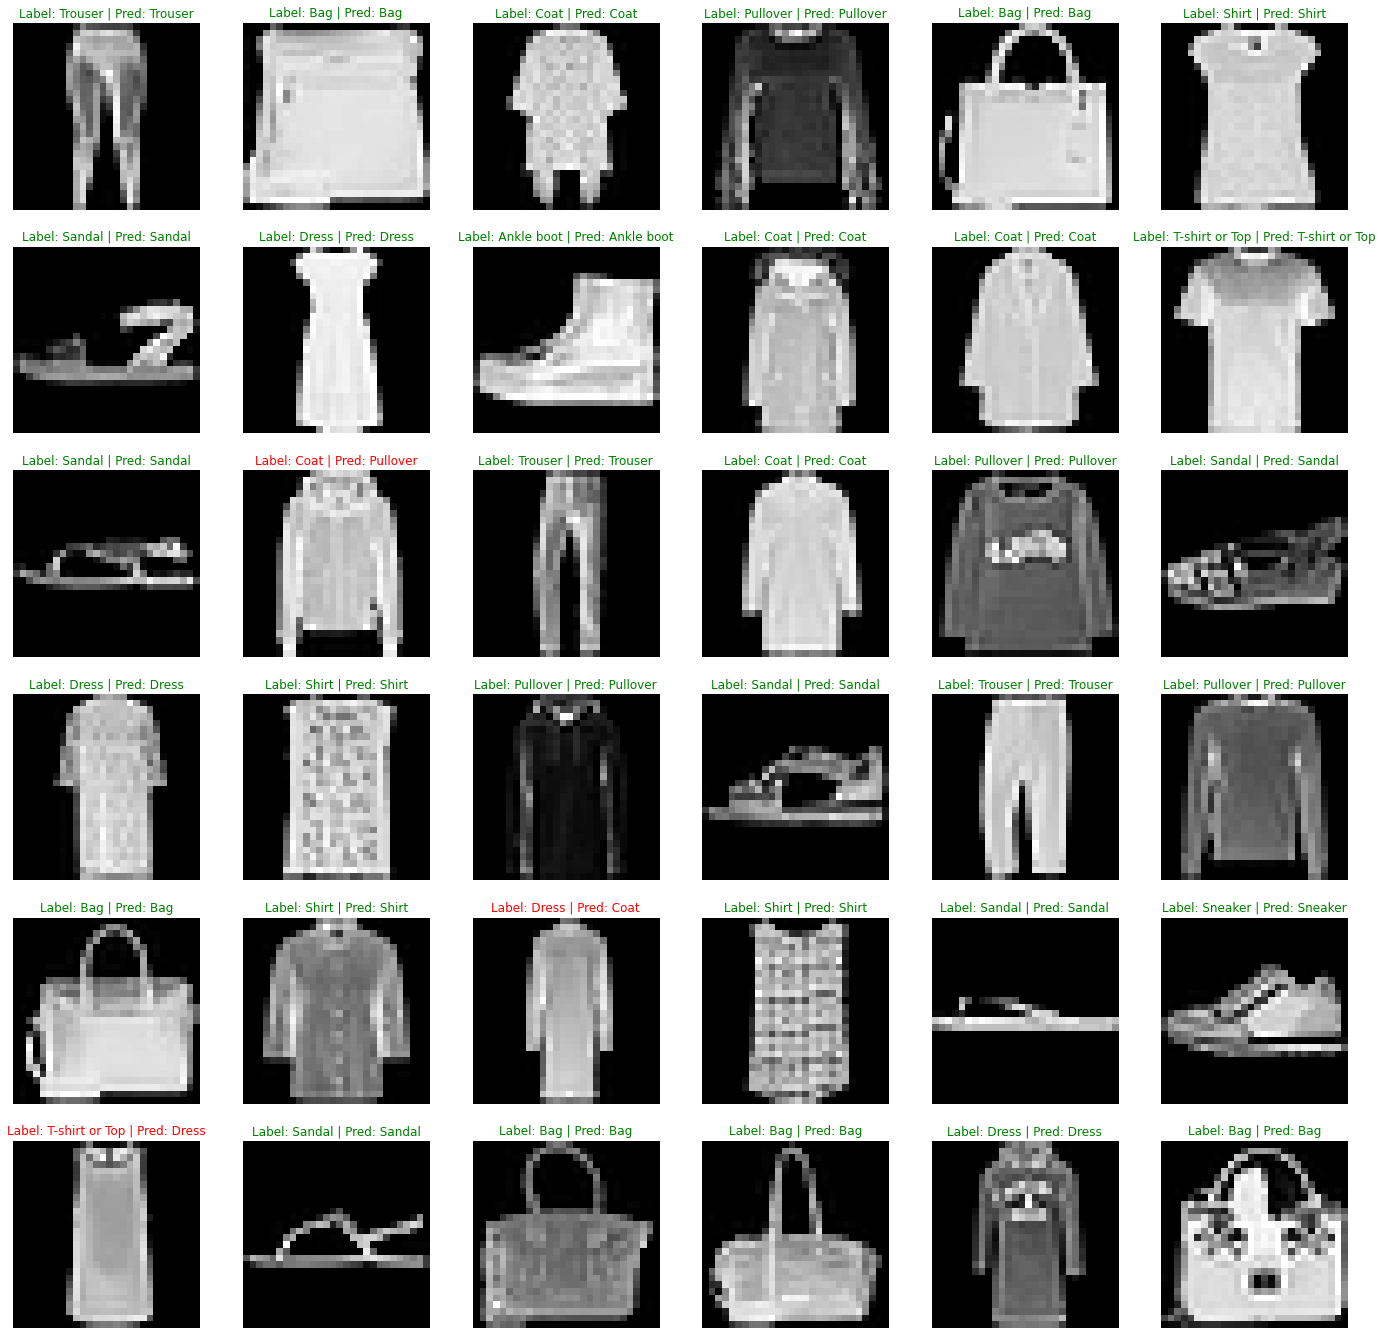

In [20]:
fig, axes = plt.subplots(6, 6, figsize=(24,24))
for img, label, pred, ax in zip(feature, target, preds, axes.flatten()):
  ax.imshow(img.view(28, 28).cpu(), cmap='gray')
  font = {"color" : 'r'} if label != pred else {"color": 'g'}
  label, pred = label2cat[label.item()], label2cat[pred.item()]
  ax.set_title(f"Label: {label} | Pred: {pred}", fontdict=font);
  ax.axis('off');